# Install Libaries

In [1]:
# pip install pandas

In [2]:
# pip install numpy

In [3]:
# pip install matplotlib

In [4]:
# pip install seaborn

In [5]:
# pip install ydata_profiling

In [6]:
# pip install scikit-learn

In [7]:
# pip install scikit-plot

# Start of project

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Add data to dataframe
# df = pd.read_csv('spam.csv')
# df = pd.read_csv('spamham.csv')
df = pd.read_csv('Phishing_Email.csv')
df.head()

,Serial,Message,Category
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [11]:
# Check for missing values
df['Category'].isnull().sum()

3

In [12]:
# Check for missing values
df['Message'].isnull().sum()

16

In [13]:
df[df['Category'].isnull()].index.tolist()

[947, 948, 10771]

In [14]:
df[df['Message'].isnull()].index.tolist()

[31,
 387,
 1877,
 2043,
 2444,
 2965,
 3619,
 3797,
 5751,
 6286,
 6805,
 8568,
 9966,
 11035,
 11284,
 13802]

In [15]:
# Remove rows with missing values
df = df.dropna()

In [16]:
# Check for missing values after applying dropna
df['Category'].isnull().sum()

0

In [17]:
# Check for missing values after applying dropna
df['Message'].isnull().sum()

0

In [18]:
# Save figure function
import os
from pathlib import Path
from matplotlib import pyplot as plt
IMAGES_PATH = Path() / "IMAGES" 
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

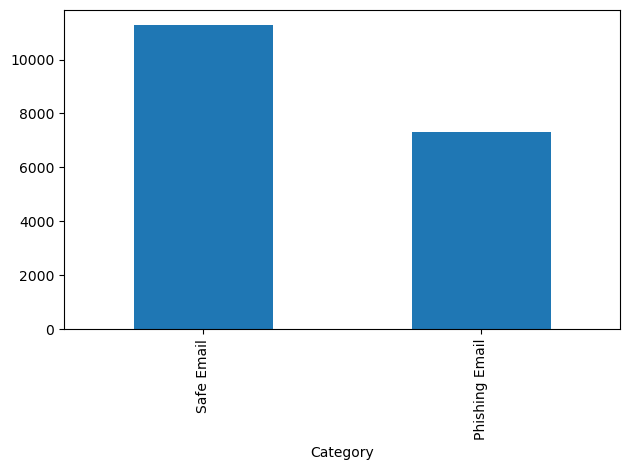

In [19]:
df['Category'].value_counts().plot.bar()
save_fig('Number of spam and ham mail in dataset plot')

In [20]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='report_about_dataset_before_preprocessing.html');

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
# replace the null values with a null string
mail_data = df.where((pd.notnull(df)),'')

In [22]:
# mail_data.head(5572)
mail_data.head(4845)

,Serial,Message,Category
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
...,...,...,...
4850,4860,"rules , innateness , psychological reality gui...",Safe Email
4851,4861,just saw the ISOs on an internal server here a...,Safe Email
4852,4862,= ? utf - 8 ? q ? designer replicas ? = actual...,Phishing Email
4853,4863,start date : 2 / 4 / 02 ; hourahead hour : 24 ...,Safe Email


In [23]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(18571, 3)

In [24]:
mail_data.columns

Index(['Serial', 'Message', 'Category'], dtype='object')

In [25]:
# If i use Phishing_Email then this coding part will be in action

# Labeling ham mail as 0; labeling spam mail as 1;  

mail_data.loc[mail_data['Category'] == 'Safe Email', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'Phishing Email', 'Category',] = 1

In [26]:
# If i use remaining dataset then this coding part will be in action

# Labeling ham mail as 0; labeling spam mail as 1;  

# mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 0
# mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 1





In [27]:
# separating the data as texts and label

X = mail_data['Message']

y = mail_data['Category']

In [28]:
# Splitting into traing test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 55)

In [29]:
print('Shape of dataset before split:',X.shape)
print('Shape of train dataset:',X_train.shape)
print('Shape of test dataset:',X_test.shape)

Shape of dataset before split: (18571,)
Shape of train dataset: (14856,)
Shape of test dataset: (3715,)


In [30]:
X_train.describe()

count     14856
unique    14047
top       empty
freq        437
Name: Message, dtype: object

In [31]:
X_test.describe()

count      3715
unique     3595
top       empty
freq         95
Name: Message, dtype: object

In [32]:
X_train.head()

1030     Â \nHerbal Alternative\nfor Erectile Dysfuncti...
14561    re : visit to enron nick , the airport is abou...
1465     is your family protected ? life can change in ...
3622     no more penis enlarge ripoffs ! read this befo...
15246    the installation of the equipment you ordered ...
Name: Message, dtype: object

In [33]:
X_test.head()

12877    confs : translating and the computer 20 aslib ...
4297     problem is clearly because the info isn't sync...
12172    2nd call , tls 1999 - - - - - - - - - - - - - ...
8634     = = = > home computer workers needed now ! < =...
2743     I was serious. I'm awful with perl/etc. I just...
Name: Message, dtype: object

In [34]:
y_train.head()

1030     1
14561    0
1465     1
3622     1
15246    0
Name: Category, dtype: object

In [35]:
X_train

1030     Â \nHerbal Alternative\nfor Erectile Dysfuncti...
14561    re : visit to enron nick , the airport is abou...
1465     is your family protected ? life can change in ...
3622     no more penis enlarge ripoffs ! read this befo...
15246    the installation of the equipment you ordered ...
                               ...                        
15178    \n"Craig R.Hughes" said:> Seems like a good id...
10228    the increasing prevalence of web services (not...
16272    enrononline weekly public report for november ...
17371    daily shipping on all orders doctor recommende...
4772     fw : did you get the check ? how are things wh...
Name: Message, Length: 14856, dtype: object

# Feature Extraction

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
# transform the text data to feature vectors that can be used 

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert y_train and y_test values as integers


# If i use Phising_email dataset i will use this code

y_train = pd.to_numeric(y_train) 

# ValueError: invalid literal for int() with base 10: '' if use .astype method || 
#the empty string is parsed as NaN if to_numeric method passed

y_test = pd.to_numeric(y_test)


# If i use remaining datasets i will use this code

# y_train = y_train.astype('int')
# y_test = y_test.astype('int')

In [38]:
print(X_train_features)

  (0, 96665)	0.16484217246697774
  (0, 15949)	0.09581554411095394
  (0, 31647)	0.11306828712700324
  (0, 76492)	0.13371643141173448
  (0, 97600)	0.1440102831561477
  (0, 101771)	0.13026364714814262
  (0, 60049)	0.12496815786236824
  (0, 43476)	0.12496815786236824
  (0, 124106)	0.1072112969355859
  (0, 46597)	0.11034733341912709
  (0, 101774)	0.13248410804986932
  (0, 32688)	0.14657361714678083
  (0, 96954)	0.13558447413842445
  (0, 64682)	0.13983123693286229
  (0, 32566)	0.13504744204050248
  (0, 108495)	0.08130129078941421
  (0, 72871)	0.09187091594653549
  (0, 102674)	0.073775398146809
  (0, 108523)	0.08713884350852338
  (0, 60446)	0.18791822061647157
  (0, 51876)	0.1380792226611187
  (0, 47856)	0.10695348160587544
  (0, 32143)	0.10572115824401027
  (0, 65067)	0.09835706989430883
  (0, 96499)	0.09717932077134071
  :	:
  (14854, 100431)	0.12075872029475698
  (14854, 121890)	0.17292699062090228
  (14854, 1278)	0.11530626559931688
  (14855, 99236)	0.27331981024745444
  (14855, 47114)	0.

In [39]:
print(X_test_features)

  (0, 131262)	0.025629271272843764
  (0, 131253)	0.025206285611016416
  (0, 130316)	0.029765204142228274
  (0, 130099)	0.015937343054072843
  (0, 129865)	0.008231739291272142
  (0, 129838)	0.022018965945681538
  (0, 129834)	0.02722157283215911
  (0, 129823)	0.037767952616396705
  (0, 129805)	0.01475980541167235
  (0, 129647)	0.022565093072792388
  (0, 129144)	0.01096289128973321
  (0, 128464)	0.019330194661522186
  (0, 128015)	0.01686462142414673
  (0, 127865)	0.0076793178826956195
  (0, 127576)	0.0074615958515668775
  (0, 126870)	0.045130186145584776
  (0, 126457)	0.018137846568522912
  (0, 126118)	0.0356052474856008
  (0, 125745)	0.009788663225478913
  (0, 125449)	0.032481905238876736
  (0, 125160)	0.02132319686754358
  (0, 124412)	0.008329970922348441
  (0, 124392)	0.024213571769637576
  (0, 124384)	0.08711803301967713
  (0, 124361)	0.09536696906978451
  :	:
  (3714, 44857)	0.07716014572890263
  (3714, 44563)	0.07979705465405472
  (3714, 43126)	0.038148366394450815
  (3714, 41289)	0

In [40]:
y_train.shape

(14856,)

In [41]:
y_test.shape

(3715,)

In [42]:
y_train.describe()

count    14856.000000
mean         0.394655
std          0.488793
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Category, dtype: float64

In [43]:
y_test.describe()

count    3715.000000
mean        0.386541
std         0.487022
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Category, dtype: float64

In [44]:
print(y_train)

1030     1
14561    0
1465     1
3622     1
15246    0
        ..
15178    0
10228    0
16272    0
17371    1
4772     1
Name: Category, Length: 14856, dtype: int64


In [45]:
print(y_test)

12877    0
4297     0
12172    0
8634     1
2743     0
        ..
15312    0
17848    1
10493    0
12036    0
17830    1
Name: Category, Length: 3715, dtype: int64


In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import scikitplot as skplt
import pickle

def Results(clf):
    clf.fit(X_train_features, y_train)
    pickle.dump(clf, open('model.pkl' , 'wb'))
    predictions = clf.predict(X_test_features)
    print ("Classifier: ", clf);
    print ('Train Accuracy: ', "{:.3f}".format(accuracy_score(y_train, clf.predict(X_train_features))));
    print ('Test Accuracy: ', "{:.3f}".format(accuracy_score(y_test, predictions)));
    print(classification_report(y_test, predictions));
    skplt.metrics.plot_confusion_matrix(y_test,predictions)
    save_fig('Confusion Matrix for '+ str(clf))
    print('─' * 57); 

Classifier:  DummyClassifier(strategy='most_frequent')
Train Accuracy:  0.605
Test Accuracy:  0.613
              precision    recall  f1-score   support

           0       0.61      1.00      0.76      2279
           1       0.00      0.00      0.00      1436

    accuracy                           0.61      3715
   macro avg       0.31      0.50      0.38      3715
weighted avg       0.38      0.61      0.47      3715

─────────────────────────────────────────────────────────
Classifier:  DecisionTreeClassifier()
Train Accuracy:  0.989
Test Accuracy:  0.925
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      2279
           1       0.87      0.94      0.91      1436

    accuracy                           0.92      3715
   macro avg       0.92      0.93      0.92      3715
weighted avg       0.93      0.92      0.93      3715

─────────────────────────────────────────────────────────
Classifier:  DecisionTreeClassifier(criterion='

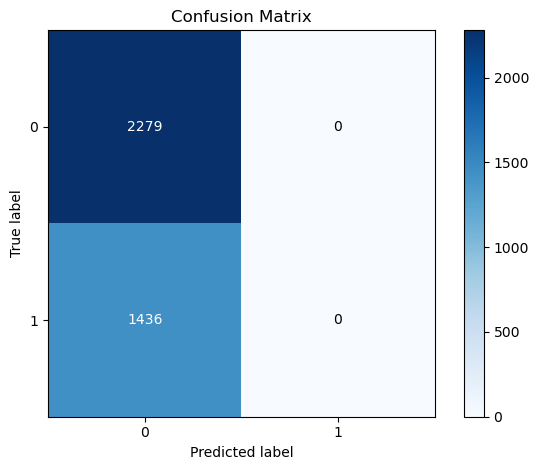

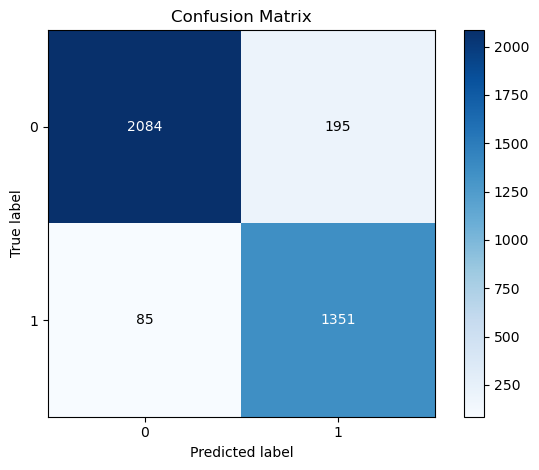

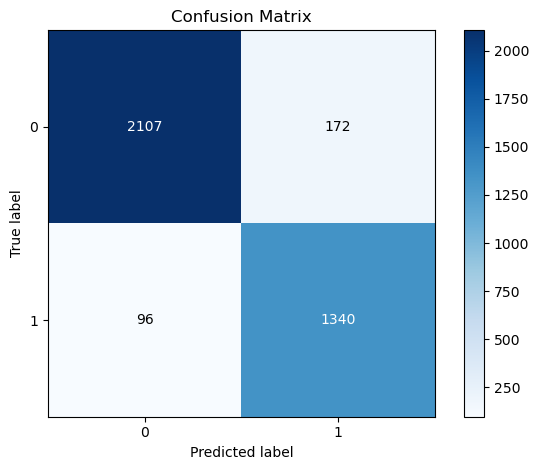

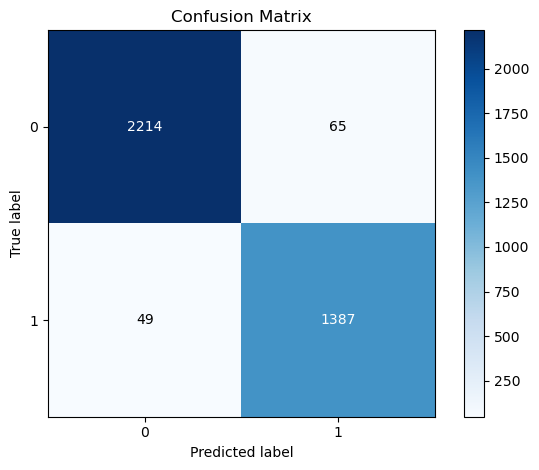

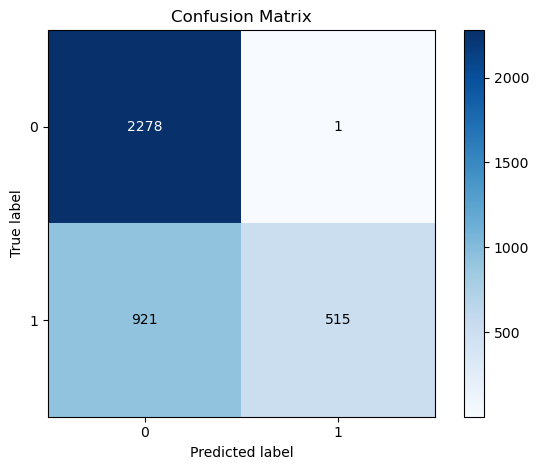

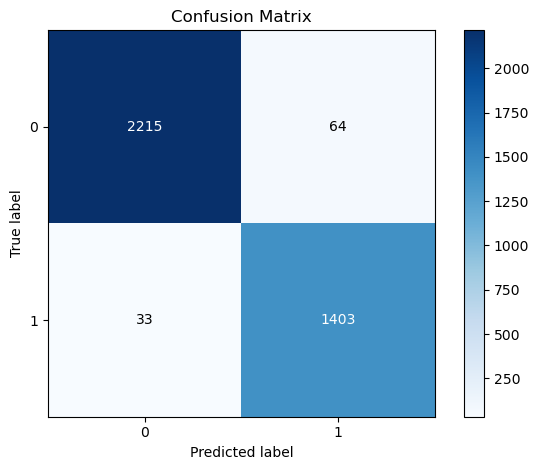

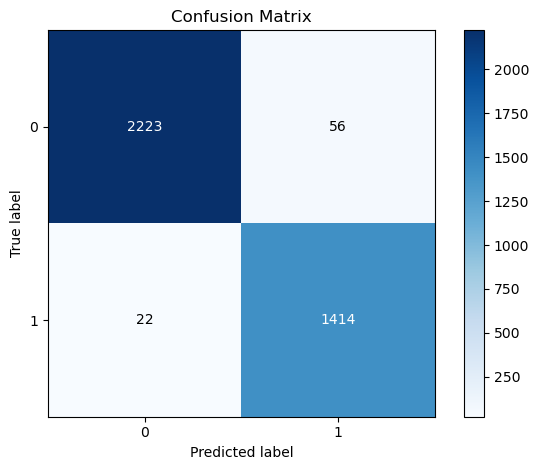

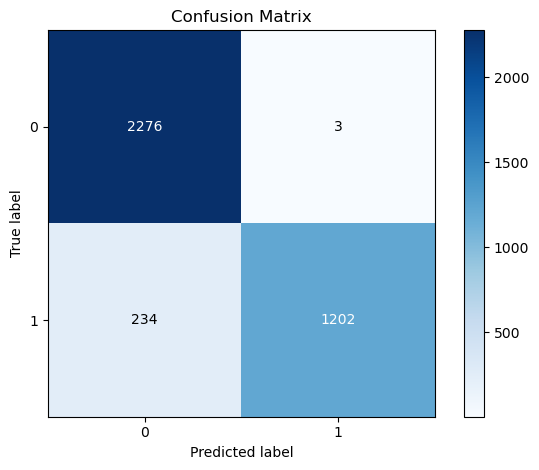

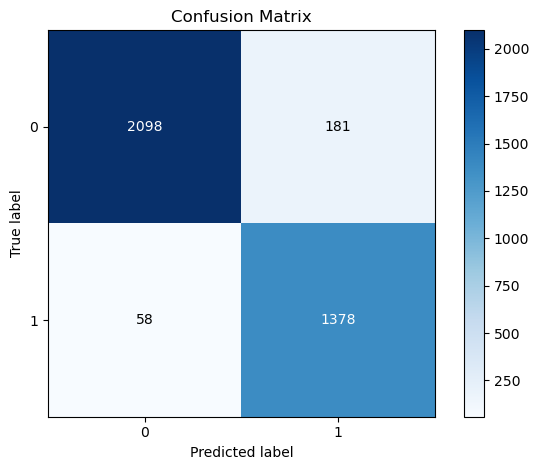

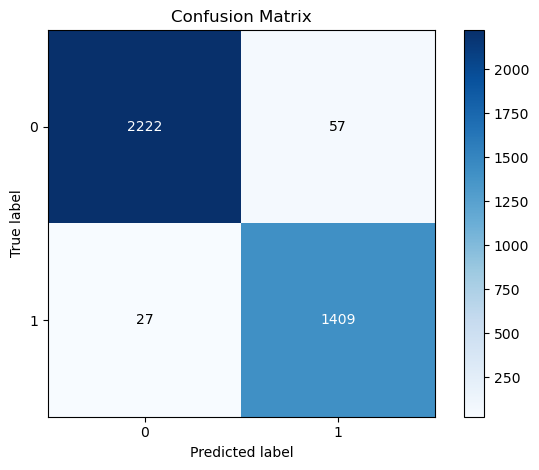

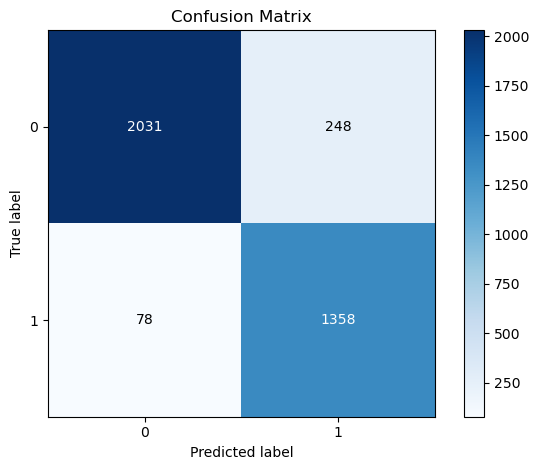

In [47]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

ZeroR = DummyClassifier(strategy = "most_frequent")
zrc = DummyClassifier()
dt = DecisionTreeClassifier(criterion = 'gini')
dt2 = DecisionTreeClassifier(criterion = 'entropy')
rf = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=5)
lr = LogisticRegression ()
svc = SVC()
nb = MultinomialNB()
gbc = GradientBoostingClassifier()
ann = MLPClassifier()
adaboost = AdaBoostClassifier()


classifiers = [ZeroR, dt, dt2, rf, knn,lr,svc,nb,gbc,ann,adaboost]

for clf in classifiers:
    Results(clf)

In [48]:
dt.feature_importances_

array([0.        , 0.00085935, 0.        , ..., 0.        , 0.        ,
       0.        ])

# Predictive System

In [49]:
input_mail = ["both male and female could be affected by aging sash zmed unidraw xnirys socratean totry a 6 xvy where - ever order the m ^ eds you need , then enjoy complimentary consultation , rx and deliv ^ ery . legitimate and fast access to meds on paain relief , anti - an ) xiety , anti - depresion , cancer , heart disease , sexual health and women ' s health . zone for loow price meds http : / / dpyur . com . . com / ? exu 6 mlly / ljjofexhvgmv have your order 0 cost delivered . $ 0 for consultation and prescriiption your joy and tears ill gladly shareand when things go wrong dear to spinout . . spinoutbetter watch those curves , never let her steer she can strip your gearsshe ' ll get your heart , goin ' fast"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = clf.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Spam mail')

else:
  print('Ham mail')

[1]
Spam mail
